In [43]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import numpy.linalg
from scipy import *

Construcción de trayectoria
Se ha registrado la posición de un vehículo autónomo que circula en un parque industrial mediante GPS
en distintos instantes de tiempo (ver archivo mediciones.csv). La posición del vehículo se registra en dos
dimensiones en coordenadas x1 (ti ), x2 (ti ).
• Por otro lado, se han realizado 4 mediciones de posición de otro vehículo que se encuentran en el
archivo mediciones2.csv. Se solicita aproximar la trayectoria de este segundo vehículo y determinar
con métodos numéricos en que coordenadas el primer vehículo atraviesa la trayectoria del segundo
vehículo.
primer vehículo tiene los puntos en el archivo mediciones.csv se aproximó con Splines.

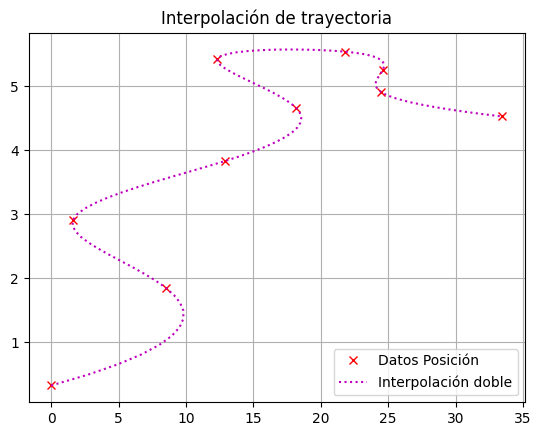

In [44]:
# Interpolo con Splines la trayectoria del primer coche

data = np.loadtxt("pvd_data/mnyo_mediciones.csv", delimiter=",")

# Paso los datos a un array de numpy
data_array = np.array(data)
x_1_values = data_array[:, 0]
x_2_values = data_array[:, 1]
time_values = np.array(range(0,10))

# Interpolo los datos con Splines
inter_x_1 = sp.interpolate.interp1d(time_values, x_1_values, 'cubic')
inter_x_2 = sp.interpolate.interp1d(time_values, x_2_values, 'cubic')

# Declaro el dominio e imagen de las funciones
ts = np.linspace(min(time_values), max(time_values), 100)
x_1s = inter_x_1(ts)
x_2s = inter_x_2(ts)

# Grafico la función
plt.plot(x_1_values, x_2_values, 'rx', label='Datos Posición')
plt.plot(x_1s, x_2s, 'm:', label='Interpolación doble')

plt.title('Interpolación de trayectoria')
plt.legend()
plt.grid(True)
plt.show()

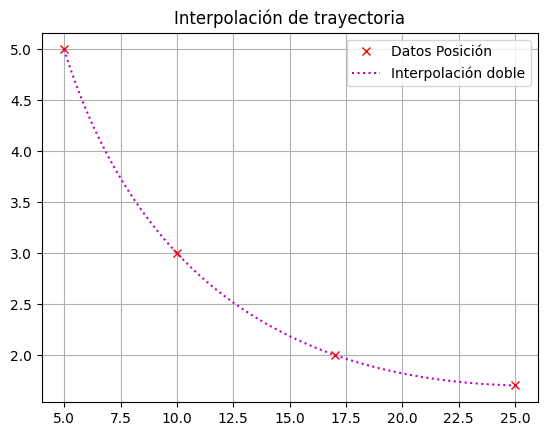

In [49]:
data = np.loadtxt("pvd_data/mnyo_mediciones2.csv", delimiter=",")

# Paso los datos a un array de numpy
data_array = np.array(data)
x_1_values = data_array[:, 0]
x_2_values = data_array[:, 1]
time_values = np.array(range(0, len(x_1_values)))  # Ensure time_values has the same length as x_1_values

# Interpolo los datos con Splines
inter_x_1 = sp.interpolate.interp1d(time_values, x_1_values, 'cubic')
inter_x_2 = sp.interpolate.interp1d(time_values, x_2_values, 'cubic')

# Declaro el dominio e imagen de las funciones
ts = np.linspace(min(time_values), max(time_values), 100)
x_1s = inter_x_1(ts)
x_2s = inter_x_2(ts)

# Grafico la función
plt.plot(x_1_values, x_2_values, 'rx', label='Datos Posición')
plt.plot(x_1s, x_2s, 'm:', label='Interpolación doble')

plt.title('Interpolación de trayectoria')
plt.legend()
plt.grid(True)
plt.show()

In [55]:
# uso el método de newton raphson para encontrar la intersección de los dos coches
# Para esto utilizo el numpy linalg y lo saco con el jacobiano
# La idea es encontrar la raíz de la función f(x,y) = (x1(t) - x2(t), y1(t) - y2(t))
# El resultado debería dar algo cercano a (x=8, y=3)

def f(t):
    x1 = inter_x_1(t)[0]
    x2 = inter_x_2(t)[0]
    return np.array([x1 - x2, x1 - x2])

def jacobian(f, x):
    n = len(x)
    jacobian = np.zeros((n, n))
    h = 1e-10  # Decrease the step size
    for i in range(n):
        x_plus_h = x.copy()
        x_plus_h[i] += h
        jacobian[:, i] = (f(x_plus_h) - f(x)) / h
    return jacobian

def newton_raphson(f, x0, tol=1e-5, max_iter=100):
    x = x0
    for i in range(max_iter):
        delta_x = numpy.linalg.solve(jacobian(f, x), -f(x))
        x += delta_x
        if numpy.linalg.norm(delta_x) < tol:
            return x
    return x

t0 = 0
t1 = 3
t = newton_raphson(f, np.array([t0, t1]))
print(t)
print(f(t))

# Grafico la función
plt.plot(x_1_values, x_2_values, 'rx', label='Datos Posición')
plt.plot(x_1s, x_2s, 'm:', label='Interpolación doble')
plt.plot(inter_x_1(t), inter_x_2(t), 'bo', label='Intersección')

plt.title('Interpolación de trayectoria')
plt.legend()
plt.grid(True)
plt.show()

LinAlgError: Singular matrix